# Mineral Micro early game

Do mid diamond players micro their workers early game? 

In [42]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('replays.csv')
df

,Map,Player1,Player1_Race,Player1_Result,Player1_MMR,Player1_Split,Player1_Micro,Player2,Player2_Race,Player2_Result,Player2_MMR,Player2_Split,Player2_Micro
0,2000 Atmospheres LE,cruiseship,Z,True,3575,1,0,WarDaddy,T,False,3558,1,0
1,2000 Atmospheres LE,WodiWetihW,T,False,3642,0,1,cruiseship,Z,True,3571,1,0
2,2000 Atmospheres LE,cruiseship,Z,True,3487,2,1,HughZephyro,P,False,3505,0,0
3,2000 Atmospheres LE,CoreNut,Z,False,3821,1,0,cruiseship,T,True,3865,1,1
4,2000 Atmospheres LE,cruiseship,T,False,3959,0,1,Markam,Z,True,4020,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,Waterfall,cruiseship,T,False,3341,1,0,Tamas,P,True,3267,0,0
2472,Waterfall,ChronicDrake,Z,False,3260,0,0,cruiseship,T,True,3342,1,0
2473,Waterfall,lazycom,P,False,3352,0,1,cruiseship,T,True,3363,0,1
2474,Waterfall,cruiseship,P,False,3884,0,0,CaptnCruncho,Z,True,3907,1,0


In [29]:
not_me1 = df[df['Player1'] != 'cruiseship']
not_me2 = df[df['Player2'] != 'cruiseship']

p2 = not_me2.rename(columns={'Player2_MMR': 'MMR', 'Player2_Split': 'Split', 'Player2_Micro':'Micro', 'Player2_Race': 'Race', 'Player2':'Name', 'Player2_Result':'Result'})
p1 = not_me1.rename(columns={'Player1_MMR': 'MMR', 'Player1_Split': 'Split', 'Player1_Micro':'Micro', 'Player1_Race': 'Race', 'Player1':'Name', 'Player1_Result':'Result'})


p = pd.DataFrame(columns=['MMR', 'Split', 'Micro', 'Total', 'Map', 'Race', 'Name', 'Result'])

'''
p.loc[:, 'Map'] = not_me1['Map']
p.loc[:, 'MMR'] = not_me1['Player1_MMR']

p.loc[:, 'Split'] = not_me1['Player1_Split']
p.loc[:, 'Micro'] = not_me1['Player1_Micro']
p.loc[:, 'Race'] =  not_me1['Player1_Race']
p.loc[:, 'Name'] =  not_me1['Player1']
p.loc[:, 'Result'] = not_me1['Player1_Result']
'''

p = pd.concat([p, p2[['MMR', 'Split', 'Micro', 'Map', 'Race', 'Name', 'Result']]], ignore_index=True)
p = pd.concat([p, p1[['MMR', 'Split', 'Micro', 'Map', 'Race', 'Name', 'Result']]], ignore_index=True)
p



,MMR,Split,Micro,Total,Map,Race,Name,Result
0,3558,1,0,NaN,2000 Atmospheres LE,T,WarDaddy,False
1,3505,0,0,NaN,2000 Atmospheres LE,P,HughZephyro,False
2,4020,0,0,NaN,2000 Atmospheres LE,Z,Markam,True
3,3579,1,0,NaN,2000 Atmospheres LE,P,nboypiatka,False
4,3735,1,3,NaN,2000 Atmospheres LE,T,MofN,True
...,...,...,...,...,...,...,...,...
2471,3731,1,0,NaN,Waterfall,P,Masa,True
2472,3004,0,0,NaN,Waterfall,T,Nepo,True
2473,3174,0,0,NaN,Waterfall,Z,whiskey,False
2474,3260,0,0,NaN,Waterfall,Z,ChronicDrake,False


In [59]:
p.loc[:, 'Total'] = p['Split'] + p['Micro']
p.loc[:, 'DoesMicro'] = p['Micro'] > 0
p.loc[:, 'DoesMicro'] = p.loc[:, 'DoesMicro'].replace({True: 1, False: 0})

p = p.loc[p['MMR']> 0]
p

,MMR,Split,Micro,Total,Map,Race,Name,Result,DoesMicro
0,3558,1,0,1,2000 Atmospheres LE,T,WarDaddy,False,0
1,3505,0,0,0,2000 Atmospheres LE,P,HughZephyro,False,0
2,4020,0,0,0,2000 Atmospheres LE,Z,Markam,True,0
3,3579,1,0,1,2000 Atmospheres LE,P,nboypiatka,False,0
4,3735,1,3,4,2000 Atmospheres LE,T,MofN,True,1
...,...,...,...,...,...,...,...,...,...
2471,3731,1,0,1,Waterfall,P,Masa,True,0
2472,3004,0,0,0,Waterfall,T,Nepo,True,0
2473,3174,0,0,0,Waterfall,Z,whiskey,False,0
2474,3260,0,0,0,Waterfall,Z,ChronicDrake,False,0


In [60]:
p.loc[p['Micro']> 0].sum()
print(p.shape[0])
p.sum()


2412


MMR                                                    8596000
Split                                                      951
Micro                                                      720
Total                                                     1671
Map          2000 Atmospheres LE2000 Atmospheres LE2000 Atm...
Race         TPZPTZPTPTZTPTTTTPTTPTPTTPTPPTPPPPPTPZTPZTPPTP...
Name         WarDaddyHughZephyroMarkamnboypiatkaMofNplayero...
Result                                                     625
DoesMicro                                                  479
dtype: object

c:\tools\Anaconda3\envs\sc2\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Micro', ylabel='MMR'>

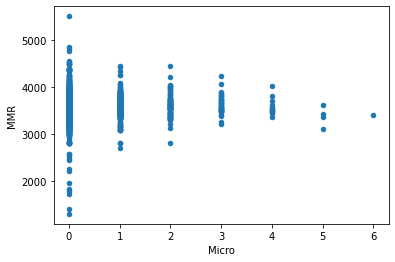

In [61]:
p.plot(x='Micro', y='MMR', kind='scatter')


In [70]:
#p.plot(y='MMR', x='DoesMicro', kind='hist')

p.groupby(pd.cut(p['MMR'], 10)).mean()


,DoesMicro
MMR,
"(1291.791, 1716.9]",0.000000
"(1716.9, 2137.8]",0.000000
"(2137.8, 2558.7]",0.000000
"(2558.7, 2979.6]",0.181818
"(2979.6, 3400.5]",0.154684
"(3400.5, 3821.4]",0.208838
"(3821.4, 4242.3]",0.224576
"(4242.3, 4663.2]",0.214286
"(4663.2, 5084.1]",0.000000


Filter out all ZvX replays of PLAYER, and display them in a table. 

Need to run add PvZ to ZvP to have a neatly formatted table. 

In [14]:
player_as_zerg1 = (df['Player1'] == PLAYER) & (df['Player1_Race'] == 'Z')

In [15]:
player_as_zerg2 = (df['Player2'] == PLAYER) & (df['Player2_Race'] == 'Z')

In [16]:
p1 = df[player_as_zerg1].groupby(by=['Player1_Race', 'Player2_Race']).sum()
p1

Player1_Result  Player2_Result
Player1_Race Player2_Race                                
Z            P                          4               4
             T                         17              12
             Z                         11               6

In [17]:
p2 = df[player_as_zerg2].groupby(by=['Player1_Race', 'Player2_Race']).sum()
p2

,,Player1_Result,Player2_Result
Player1_Race,Player2_Race,,
P,Z,4,6
T,Z,7,10
Z,Z,6,6


In [18]:
p3 = p2.rename(columns={'Player2_Result':'Player1_Result', 'Player1_Result':'Player2_Result'})
p3

,,Player2_Result,Player1_Result
Player1_Race,Player2_Race,,
P,Z,4,6
T,Z,7,10
Z,Z,6,6


In [19]:
p = p1.copy()

if ('Z', 'P') not in p.index:
    p.loc[('Z', 'P'),:] = 0
if ('Z', 'T') not in p.index:
    p.loc[('Z', 'T'),:] = 0
if ('Z', 'Z') not in p.index:    
    p.loc[('Z', 'Z'),:] = 0

if ('P','Z') not in p3.index:
    p3.loc[('P','Z'),:] = 0
if ('T','Z') not in p3.index:
    p3.loc[('T','Z'),:] = 0
if ('Z', 'Z') not in p3.index:    
    p3.loc[('Z', 'Z'),:] = 0


In [20]:

p.loc[('Z', 'P')] += p3.loc[('P','Z')]
p.loc[('Z', 'T')] += p3.loc[('T','Z')]
p.loc[('Z', 'Z')] += p3.loc[('Z','Z')]
p

Player1_Result  Player2_Result
Player1_Race Player2_Race                                
Z            P                         10               8
             T                         27              19
             Z                         17              12